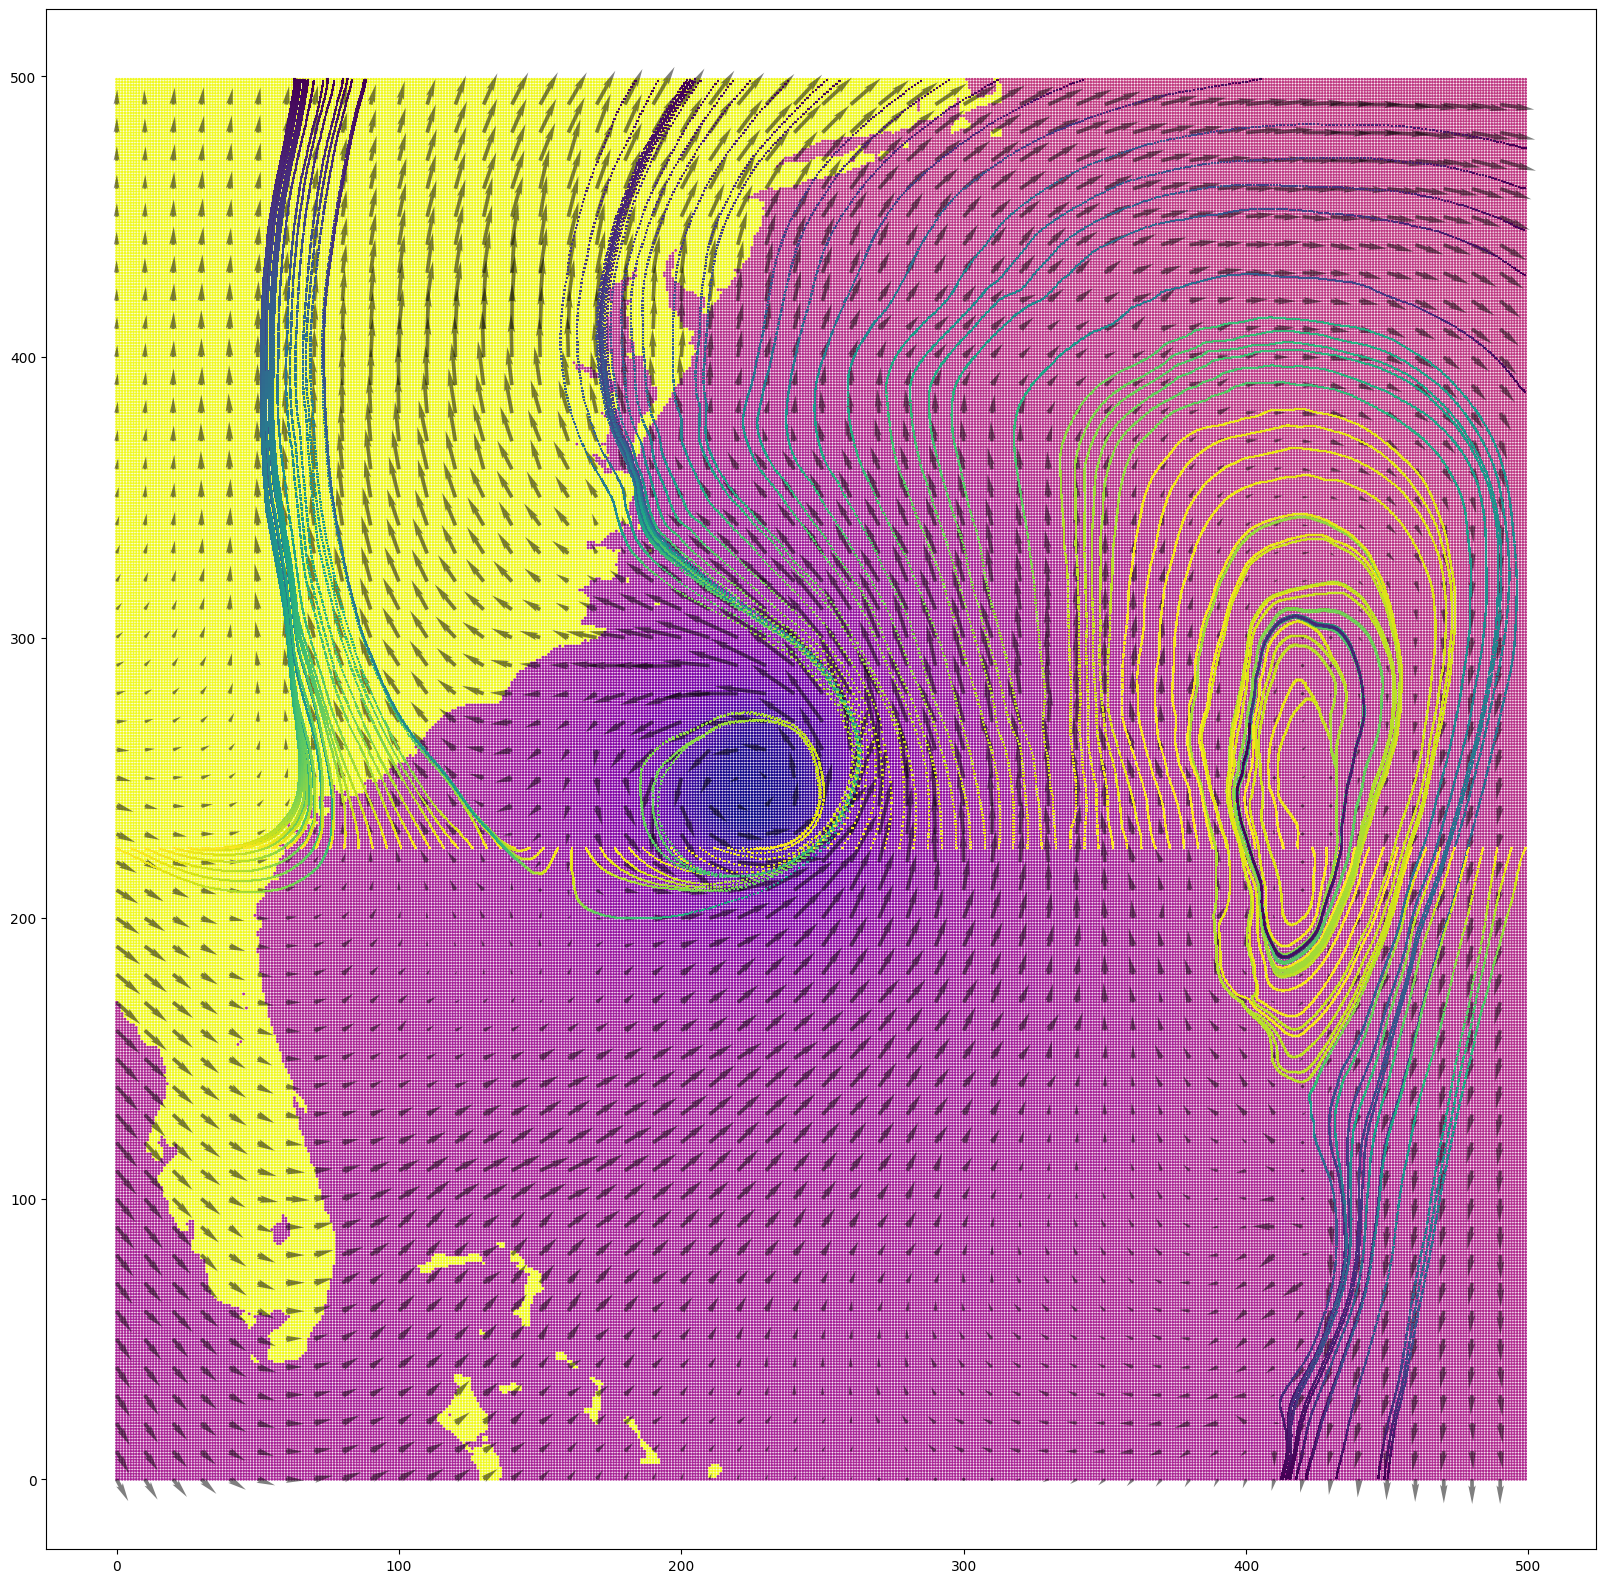

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

uData = []
vData = []

##### data loading and setup/plot image
##### argument "showBgMap": show or not to show the background map
##### DO NOT modify this function
def Initialize( showBgMap = False ):
    global uData
    global vData
    
    loadFlowData = np.load("flowData.npy", allow_pickle=True)

    ### flow data
    uData = loadFlowData.item().get('uData')
    vData = loadFlowData.item().get('vData')

    plt.rcParams['figure.figsize'] = [20, 20]

    ### plot backgroup images
    presMapX = loadFlowData.item().get('presMapX')
    presMapY = loadFlowData.item().get('presMapY')
    presMapV = loadFlowData.item().get('presMapV')
    if showBgMap == True:
        plt.scatter(presMapX, presMapY, s=1, c=presMapV, cmap='plasma')

    ### plot arrows
    x_pos = loadFlowData.item().get('x_pos')
    y_pos = loadFlowData.item().get('y_pos')
    x_direct = loadFlowData.item().get('x_direct')
    y_direct = loadFlowData.item().get('y_direct')
    plt.quiver(x_pos, y_pos, x_direct, y_direct, scale = 50,  headwidth = 2, headlength = 5, alpha = 0.5)


##### x, y: location. Return: 2D vector at [x,y] (x and y are integer only)
##### return: a 2D vector [u, v], u is horizontal direction (right is postivie), v is the vertical direction (up is positive)
##### DO NOT modify this function
def getDataVector(x, y):
    return uData[(499-y)+500*x], vData[(499-y)+500*x]


##### this function generates "numSeeds" points(seeds) from [startX, startY] to [endX, endY]
##### Return: seeds -> a list of [x, y]
def generateSeeds(startX, startY, endX, endY, numSeeds):
    seeds = []
    x = np.linspace(startX, endX, numSeeds )
    y = np.linspace(startY, endY, numSeeds )
    seeds = np.zeros([numSeeds,2])
    seeds[:, 0] = x
    seeds[:, 1] = y
    return seeds

##### this function plot a particle tracing result on the screen
##### argument "path": particle tracing result. It is represetned by a list of [x, y]. (x, y) can be floating point
##### You may not want to modify this function
def drawOneParticleTracingResult( path ):
    ps = np.array(path)
    c = np.linspace(1, 0, num=ps.shape[0])
    plt.scatter(ps[:,0], ps[:,1], c=c, s=3, marker='_')

##### (TODO) WORK on this function
##### compute ONE particle tracing result
##### you should use "getDataVector())" to get the vector you want on the grid point
##### if you need the vector between grid points, you have to implment the vector interpolation by your self
##### I do not mind the computation is efficnet or not
##### "seed": one seed (x,y)
##### "t": delta t (i suggest 0.025)
##### "steps": how many stesp for this particle tracing process
def particleTrace(seed, t, steps):
    path = []

    def getVolacity(p):

        def interpolation(a, b, p, va = None, vb = None):
            va = getDataVector(a[0], a[1]) if va is None else va
            vb = getDataVector(b[0], b[1]) if vb is None else vb

            return [va[i] + (va[i] - vb[i]) * (a[i] - p[i]) / (a[i] - b[i]) if a[i] != b[i] else va[i] for i in range(2)]


        a = [math.floor(x) for x in p]
        b = [math.ceil(x) for x in p]

        pLeft = interpolation([a[0], a[1]], [b[0], a[1]], [p[0], a[1]])
        pRight = interpolation([a[0], b[1]], [b[0], b[1]], [p[0], b[1]])
        pRes = interpolation([p[0], a[1]], [p[0], b[1]], [p[0], p[1]], pLeft, pRight)

        return pRes

    assert len(seed) == 2

    def checkValid(p):
        for v in p:
            if v > 499 or v < 0:
                return False
        return True


    for step in range(steps):
        path.append(seed)
        a = [2 * t * v for v in getVolacity(seed)]
        pa = [seed[i] + a[i] / 2 for i in range(2)]
        if not checkValid(pa):
            break

        b = [2 * t * v for v in getVolacity(pa)]
        pb = [seed[i] + b[i] / 2 for i in range(2)]
        if not checkValid(pb):
            break

        c = [2 * t * v for v in getVolacity(pb)]
        pc = [seed[i] + c[i] / 2 for i in range(2)]
        if not checkValid(pc):
            break

        d = [2 * t * v for v in getVolacity(pc)]

        seed = [seed[i] + (a[i] + 2 * b[i] + 2 * c[i] + d[i]) / 6 for i in range(2)]

        if not checkValid(seed):
            break

    return path


##### main (if you want, you can change the arguments in the generateSeeds() and the last argument in particleTrace() )
Initialize(True) ## set False to disable backgroup image display (faster a little bit)

seeds = generateSeeds(0, 225, 499, 225, 100) ##this line generates seeds (seeds to generate the graph on the homework description slides)

for seed in seeds: ###iterate through all seeds
    path = particleTrace(seed, 0.025, 10000) # compute one particle tracing of the "seed", result is a list of [x,y ]
    drawOneParticleTracingResult(path) # draw one particle path

plt.show()